# Découverte de Flask

[Vidéo d'accompagnement](https://vimeo.com/501659567)

**Notre Objectif final** est de réaliser un «micro blog» permettant à de multiples utilisateurs d'éditer et de fédérer des articles au sein d'une page web. Un utilisateur est tout internaute qui s'inscrit sur la plateforme; Une fois inscrit et connecté, il peut alors éditer, modifier, supprimer leurs articles à volonté. La page principale recense les articles de tous ces utilisateurs.

## Vue d'ensemble du «web»

L'utilisateur est derrière son client web. Il navigue de «page en page» ordinairement par l'intermédiaire de **liens** ou de **boutons** de type *submit* (adossé à un formulaire).

In [ ]:
%%HTML
<a href="...">lien...</a>
<input type="submit" value="valider"/>

Cela a pour effet de produire une *requête* *(request)* HTTP (de type GET ou POST) envoyé à un serveur web dont le rôle est de réagir en produisant une *réponse* (*response*) HTTP qui contient éventuellement une nouvelle page web sous la forme d'un texte formaté en HTML.

Lorsqu'on clique sur le bouton «valider» d'un formulaire, cela produit une requête qui peut-être de type:
- GET: les données du formulaire sont placées *directement dans l'url* (champ recherche d'un moteur de recherche) sous la forme *\<debut_url\>?nom1=v1&nom2=v2*
- POST: les données sont placées dans le corps de la requête.

In [ ]:
%%HTML
<form method="post">
<input type="date" name="une_date">
<input type="submit" value="envoyer">
</form>

Si ce formulaire appartient à la «ressource» `http://example.com/une_page`, une requête **POST** est envoyé *à la même ressource* et son *corps* contient une chaîne de la forme `une_date=<date choisie>`.

Souvent la requête est retransmise par le serveur à un script (programme) dont le rôle est de construire la réponse à la place du serveur: le serveur joue alors le rôle de **passerelle** (*gateway*) entre le client et le programme (qu'on qualifie souvent d'**application** dans ce contexte).

Enfin, les données éventuelles sont souvent sauvegardées/restaurées par l'application qui communique avec un **système de gestion de base de données** (SGBD). On obtient donc le schéma récapitulatif suivant:

<p style="text-align: center;">
     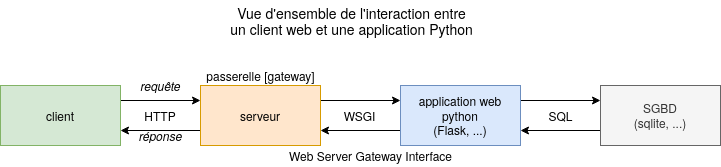
</p>

Le protocole standard de communication entre un serveur web et une application python est WSGI. Nous ne le détaillerons pas, mais c'est celui qu'utilise la librairie Flask introduite ci-après.

## 1 - Flask - Hello World

On commence par créer une application flask:

In [ ]:
from flask import Flask
app1 = Flask(__name__)

Puis, on configure une «**vue**» qui est une simple fonction «décorée» avec `@app.route()`. Cela sert à «prévenir l'application» de réagir à une requête `GET /` en construisant une réponse avec la chaîne renvoyée.

In [ ]:
@app1.route("/")
def salut(): # «vue» associée à cette route
    return "<h1>Salut tout le monde!</h1>"

Reste à faire «tourner cette application»

In [ ]:
from serveur import lancer # lancer(application) ou lancer(application, port) 

lancer(app1)

*Note*: la fonction `lancer` prend en deuxième paramètre optionnel un numéro de port entre 8000 et 8999 (au cas où le port par défaut est occupé)

#### Exercice 1

Sachant qu'il est possible de «paramétrer» une vue en fonction de la «route» demandée avec la syntaxe:
```python
@app1.route("/partie_fixe/<param>") # les chevrons font parties de la syntaxe
def salut_a(param):
    pass #faire quelquechose avec param
```
ajouter une nouvelle *vue* qui permet de saluer une personne par son **nom**: Par exemple, si la requête est de la forme `GET /salut/pauline`, l'application affiche *Salut Pauline!*.

## Travailler avec PyCharm

Il est plus commode de travailler en local avec un éditeur comme PyCharm.

#### Exercice 2

En suivant le **guide ci-dessous**, configurer Pycharm pour faire fonctionner l'application exemple de la section 1 en local (sur votre machine):
1. Commencer par créer un projet `flask_mini_apps`.
2. Créer un sous-dossier `demo1` puis placer le code de l'application exemple (*app1*) dans un fichier `demo1/app.py` (renommer systématiquement `app1` en `app`),
3. Configurer Pycharm de façon à pouvoir lancer cette application «demo1» avec une commande run nommée `run demo1`.

**GUIDE PYCHARM**: Après avoir créer un nouveau projet,

1. Installer flask (*File -> settings...*),

2. Je suppose que vous avez un fichier Python définissant le nom `app` comme dans l'exemple de la section précédente (à cela près que le nom doit-être `app` et non `app1` - donc adapter!)

3. Créer une commande pour démarrer un serveur de développement pour cette application flask:
   - menu *run -> edit configuration*,
   - puis ajouter (*+*) une nouvelle «configuration» pour Python:
       - Nommer là `run app` (par exemple!),
       - **changer** *Script path* en *Module name* puis indiquer `flask`
       - *Parameters*: mettre `run`
       - *Environnement variables*: ajouter `FLASK_APP=<nom>;FLASK_ENV=development` où `<nom>` est celui du fichier contenant l'application sans l'extension `.py`,
       - **Si** le fichier contenant l'application n'est pas dans le dossier du projet, mais dans un sous-dossier, modifier le *working directory* de façon à le faire pointer sur ce sous-dossier; **Sinon** laisser vide
       - *Ok* pour finir
   - enfin, tester en sélectionnant votre commande (en haut à droite près de la flèche): normalement, la console indique le démarrage du serveur et l'url pour accéder à l'application avec le navigateur.

## 2 - Liens entre les vues

La librairie Flask définie une fonction `url_for("<nom_de_la_vue>")` qui renvoie l'url de la vue indiquée.

In [ ]:
#Pycharm: demo2/app.py ; renommer app2 en app.
from flask import Flask, url_for
app2 = Flask(__name__)

@app2.route("/")
def vue1():
    page2 = url_for('vue2')
    return f"""
    <h1>Première page</h1>
    <a href="{page2}">Deuxième page</a>"""

@app2.route("/autre")
def vue2():
    return """
    <h1> Deuxième ...</h1>
    <a href="{}">Première Page</a>""".format(url_for('vue1'))

Attention à bien arrêter le serveur précédent avant de lancer celui-ci:

In [ ]:
from serveur import lancer

lancer(app2)

#### Exercice 3

Créer une troisième vue de route "/exercice" qui propose deux liens vers chacune des autres vues. 

## 3 - Formulaire

Commençons par un peu de HTML dans des chaînes multilignes.

In [ ]:
# accueil
base = """
<h1>Salut tout le monde!</h1>
<p><a href={}>Aller au formulaire</a><p>
""" # on utilise des points d'insertions «{}» qu'on comblera avec .format

# un formulaire minimaliste
si_get = """
<form method="post">
<input type="date" name="une_date">
<input type="submit" value="envoyer">
</form>
"""

# ce qu'on affichera lorsqu'il sera soumis
si_post = """
<p>La date saisie est {}</p>
<p><a href="{}">Saisir une autre date</a> - <a href="{}">Revenir à la page principale</a></p>
"""

Flask définie un objet `request` lequel permet d'accéder aux éléments de la requête de l'utilisateur. Plus précisément:
- `request.method` vaut "GET" ou "POST" selon le type de requête,
- `request.form` est un dictionnaire permettant d'accéder au valeurs soumises via un formulaire. 

In [ ]:
from flask import Flask, request, url_for
# request sert à récupérer des éléments de la requête
# url_for à produire une url étant donné le nom d'une vue.

app3 = Flask(__name__)

@app3.route("/")
def accueil():
    return base.format(url_for('formulaire'))


@app3.route("/form", methods=["GET", "POST"]) # précise les types de requêtes possibles
def formulaire():
    # Si c'est "POST", c'est que le formulaire a été soumis
    if request.method == "POST":
        date = request.form["une_date"]
        return si_post.format(date, url_for('formulaire'), url_for('accueil'))
    # Sinon "GET" on affiche le formulaire.
    return si_get

Voyez par vous-même (Attention à bien arrêter le serveur précédent!)

In [ ]:
from serveur import lancer # lancer(application) ou lancer(application, port) 

lancer(app3)

#### Exercice 4

Retravailler la vue `formulaire` de façon que, en plus de la date, l'utilisateur puisse choisir une couleur pour sa présentation.

*Aide*: Retravailler les chaînes `si_get` et `si_post`. Pour la première, englober la date à afficher par une balise «en ligne» générale `<span>` dont l'attribut *style* règle la couleur du texte avec la propriété CSS `color`.

## 4 - Session

On parle de **session** lorsque l'utilisateur est identifié par l'application.

Commençons par un simple formulaire de login (être attentif aux valeurs des attributs *name*) et un utilisateur fictif (normalement on le récupère depuis une bdd).

In [ ]:
login_form = """
<form method="post">
login: <input type="text" name="login"><br/>
mdp: <input type="password" name="mdp"><br/> 
<input type="submit" value="envoyer">
</form>
"""

user = {
    "id": 0,
    "login": "lambda",
    "mdp": "secret",
}

Flask définie un objet `session` qui se manipule similairement à un dictionnaire:
- `session[<cle>] = val` pour créer l'association clé-valeur,
- `session.get(<cle>)` pour récupérer la valeur associée à la clé ou `None` si la clé n'existe pas,
- `session.clear()` pour «nettoyer» la session.

Pour pouvoir utiliser le système de session de Flask, il faut renseigner l'attribut `secret_key` de l'application (permet à Flask de la sécuriser).

Enfin, Flask définit aussi une fonction `redirect(<url>)` qui sert à **rediriger** vers une autre vue que la vue courante. Elle s'utilise souvent en combinant avec `url_for(<nom de la vue>)`.

Voici un exemple simple qui défini 3 vues: `login` pour l'authentification par formulaire, `logout` pour se déconnecter et `accueil` qui réagit différemment si l'utilisateur est connecté ou non.

In [ ]:
from flask import Flask, request, url_for, session, redirect

app4 = Flask(__name__)
app4.secret_key = "dev" # pour activer le système de session...

@app4.route('/login', methods=["GET", "POST"])
def login():
    if request.method == "POST":
        login = request.form["login"]
        mdp = request.form["mdp"]
        # si l'utilisateur est «lambda»
        if user["login"] == login and user["mdp"] == mdp:
            session.clear() # on ne sait jamais...
            session['userid'] = user["id"]
            return redirect(url_for('accueil'))
    # si "GET" ou si l'utilisateur n'est pas reconnue
    return login_form

@app4.route('/logout')
def logout():
    session.clear()
    return redirect(url_for('accueil'))

@app4.route('/')
def accueil():
    url_login = url_for('login')
    url_logout = url_for('logout')
    
    # l'utilisateur s'est-il authentifié ?
    #    attention «not session.get('userid')» ne fonctionnerait pas ici...
    if session.get('userid') is None: 
        return f"<h1>Salut inconnu(e)!</h1><a href={url_login}>S'identifier</a>"
    else:
        return f"<h1>Salut lambda!</h1><a href={url_logout}>Se déconnecter</a>"

In [ ]:
from serveur import lancer # lancer(application) ou lancer(application, port) 

lancer(app4)

**Petits rappels de 1e**: Les sessions sont réalisées en échangeant un **cookie** (petite donnée textuelle):
1. Lors de l'authentification, le serveur demande au client d'enregistrer un cookie,
2. puis, à chaque requête, le client renvoie au serveur le (ou les) cookies (qu'il lui a communiqué précédemment),
3. Lors de la déconnexion, le serveur demande au client de supprimer ce(s) cookie(s).

Pour voir ce mécanisme, ouvrir l'outil d'analyse de firefox (clic droit -> *examiner l'élément* puis ouvrir l'onglet *Stockage*) pendant que vous naviguez sur l'application. Le cookie est rendue illisible (en utilisant *secret key*) pour renforcer la sécurité.

#### Exercice 5

Il est dangereux d'écrire un mot de passe en clair (aussi bien dans un dictionnaire que dans une base de données). Lorsqu'on installe Flask, plusieurs autres librairies sont installées et notamment `werkzeug` dont le module `security` propose deux fonctions utiles pour régler ce problème.

In [71]:
from werkzeug.security import generate_password_hash, check_password_hash

Lire brièvement l'aide de chacune d'elles:

In [ ]:
?generate_password_hash

In [ ]:
?check_password_hash

Puis faites quelques tests basiques pour les «prendre en main»:

In [ ]:
# à vous de jouer

Enfin, modifier le dictionnaire `user` de façon à faire en sorte qu'il ne contienne plus *directement* le mot de passe en clair et le code de `app4` afin que la session fonctionne tout de même.

## 5 - Base de données (avec sqlite)

Commençons par définir un schéma simple en SQL (en lien avec notre mini blog) formé de deux relations:
- `membres(!id,login,mdp)` et,
- `articles(!id,#auteur_id,cree_le,titre,contenu)`

Pour plus de détails, ouvrir le fichier *schema.sql* qui définit aussi un petit jeu de données.

Initialisons la base de données (dans une fonction pour pouvoir la rappeler plus tard).

In [ ]:
import sqlite3 as db

def init_db():
    conn = db.connect("mini_blog.db") # connect(nom_fichier) renvoie un handler de connexion
    with open("schema.sql") as script: # Ouverture du fichier contenant le schéma de la base
        conn.executescript(script.read()) # Sa lecture donne une chaîne qu'on passe à executescript(sql)
    conn.close()

init_db()

Définissons une mini application dans le but de:
1. Lister les articles dans la page d'accueil
2. Insérer un nouvel article (nous utiliserons Alice)

Pour rendre le code «plus clair», encapsulons ces deux actions dans des fonctions:

In [ ]:
def recuperer_articles(): # renvoie une liste de tuples 
                          # de la forme (login, cree_le, titre, contenu)
    with db.connect("mini_blog.db") as c:
        curs = c.execute(
            """SELECT login, cree_le, titre, contenu 
               FROM membres JOIN articles
                 ON membres.id = articles.auteur_id
                 ORDER BY articles.cree_le DESC
            """
        )
        return curs.fetchall()

def inserer_article(auteur_id, titre, contenu):
    with db.connect("mini_blog.db") as c:
        curs = c.execute(
                 """INSERT INTO articles (auteur_id, titre, contenu) 
                   VALUES (?, ?, ?)""",
                (auteur_id, titre, contenu)
            )
        c.commit() # ne pas oublier de «valider» lorsqu'une table est modifiée.

Nous sommes à présent en mesure d'écrire assez succintement cette «mini application»:

In [ ]:
from flask import Flask, request, url_for, redirect

app5 = Flask(__name__)

@app5.route('/')
def accueil():
    # Petit rappel de 1e - syntaxe des listes en «compréhension»
    articles = [
        f"""
        <article>
          <h3 style="margin-bottom: 0">{titre}</h3>
          <p style="margin-top: 0; font-size: 80%">
          crée le {cree_le} par <em>{login}</em>
          </p>
          <p style="padding-left: 20px">{contenu}</p>
          <hr/>
        </article>
        """
        for login, cree_le, titre, contenu in recuperer_articles()
    ]
    return f"""
    <nav><a href="{url_for('ajouter')}">Nouvel article</a></nav>
    """ + "\n".join(articles)

@app5.route('/ajouter', methods=["GET", "POST"])
def ajouter():
    if request.method == "POST":
        titre = request.form["titre"]
        contenu = request.form["contenu"]
        if titre and contenu:
            inserer_article(1, titre, contenu)
            return redirect(url_for('accueil'))
    return """
    <form method="post">
        Titre: <input name="titre"/><br/>
        Contenu: <textarea name="contenu"></textarea><br/>
        <input type="submit" value="Enregistrer"/>
    </form>
    """

In [ ]:
from serveur import lancer # lancer(application) ou lancer(application, port) 

lancer(app5)

#### Exercice 6

Modifier cette mini-app de façon qu'il soit possible de supprimer les post d'Alice (qui est fictivement connectée) en cliquant sur un lien *supprimer* apparaissant sur la page d'accueil à côté de chacun de ses articles (pas ceux de Bob).

#### Mémo sqlite

[**Sqlite3**](https://docs.python.org/fr/3/library/sqlite3.html#module-sqlite3) fait partie de la librairie standard de python:
- `c = connect(<nom_fichier>)` ou `with connect(<nom_fichier>) as c`: établit une connexion sur la base du fichier indiqué; on ferme la connection avec `c.close()` (fait automatiquement lorsqu'on sort du bloc *with*).

- `curs = c.cursor()`: renvoie un «curseur» qui va servir à la fois à exécuter des commandes sql et à récupérer le résultat.

- `curs.execute(sql[, <seq valeurs>])`: exécute la requête SQL; si elle contient des «point d'insertion» `?` (c'était `%s` avec postgre), on précise une séquence de valeurs qui seront insérées dans la requête. Note: si vous n'avez qu'une valeur, utiliser (valeur,) comme séquence. *Notes*:
    - on peut utiliser `c.execute(...)` (et les fonctions du même genre) directement sur le handler de connexion. Dans ce cas, la fonction renvoie ... un curseur pour lire la réponse,
    - Si l'ordre sql modifie une table (insert, delete...), il faut «valider» l'ordre avec `c.commit()`,
    - `.executescript(script_sql)` permet de d'exécuter un script sql (qu'il faut ouvrir et lire avant).


- Après avoir effectué une requête (de type select):
    - `curs.fetchall()` renvoie une liste de tuples, chaque tuple correpondant à une ligne.
    - `col1, col2, ... = curs.fetchone()` pour récupérer les colonnes d'une ligne (s'il n'y en qu'une, écrire `c, = ...` pour ne pas récupérer le tuple...)
    - On peut aussi boucler sur le curseur en utilisant la multi-affectation: `for c1, c2, ... in curs:...`.
    